In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import numpy as np
sys.path.append("../../../")
import data_loading as dl

from microfit import run_plotter as rp
from microfit import histogram as hist

In [3]:
RUN = [3]

rundata, mc_weights, data_pot = dl.load_runs(
    RUN,
    data="bnb",
    truth_filtered_sets=["nue","drt"],
    loadpi0variables=True,
    loadshowervariables=True,
    loadrecoveryvars=True,
    loadsystematics=True,
    load_lee=True,
    blinded=False,
    enable_cache=False,
)

Starting load_sample
Loaded rundict
data_path= /uboone/data/users/cthorpe/PELEE/run3/nuepresel/run3_nuepresel.root
Using old buggy code for energy estimation


../../../data_loading.py:1062: RuntimeWarning: overflow encountered in multiply
  mc_Q2 = -1 * (mc_q_E * mc_q_E - mc_q_px * mc_q_px - mc_q_py * mc_q_py - mc_q_pz * mc_q_pz)
../../../data_loading.py:1062: RuntimeWarning: invalid value encountered in subtract
  mc_Q2 = -1 * (mc_q_E * mc_q_E - mc_q_px * mc_q_px - mc_q_py * mc_q_py - mc_q_pz * mc_q_pz)
../../../data_loading.py:578: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(2 * e1 * e2 * (1 - px1 * px2 - py1 * py2 - pz1 * pz2))
../../../data_loading.py:578: RuntimeWarning: overflow encountered in float_scalars
  return np.sqrt(2 * e1 * e2 * (1 - px1 * px2 - py1 * py2 - pz1 * pz2))
/uboone/app/users/cthorpe/Mambaforge/envs/python3LEE/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


Starting load_sample
Loaded rundict
data_path= /uboone/data/users/cthorpe/PELEE/run3/nuepresel/data_extbnb_mcc9.1_v08_00_00_25_reco2_F_G_all_reco2.root
Using old buggy code for energy estimation
Starting load_sample
Loaded rundict
data_path= /uboone/data/users/cthorpe/PELEE/run3/nuepresel/prodgenie_bnb_nu_uboone_overlay_mcc9.1_v08_00_00_26_filter_run3_reco2_G_reco2.root


../../../data_loading.py:741: RuntimeWarning: invalid value encountered in true_divide
  df["proton_pz"] = np.where((mc_E_prot > 0), mc_pz_prot / mc_p_prot, np.nan)


Using old buggy code for energy estimation
Starting load_sample
Loaded rundict
data_path= /uboone/data/users/cthorpe/PELEE/run3/nuepresel/prodgenie_bnb_intrinsice_nue_uboone_overlay_mcc9.1_v08_00_00_26_run3_reco2_reco2.root
Using old buggy code for energy estimation
Starting load_sample
Loaded rundict
data_path= /uboone/data/users/cthorpe/PELEE/run3/nuepresel/prodgenie_bnb_dirt_overlay_mcc9.1_v08_00_00_26_run3_reco2_reco2.root
Using old buggy code for energy estimation
Loading lee sample
Starting load_sample
Loaded rundict
data_path= /uboone/data/users/cthorpe/PELEE/run3/nuepresel/prodgenie_bnb_intrinsice_nue_uboone_overlay_mcc9.1_v08_00_00_26_run3_reco2_reco2.root
Using old buggy code for energy estimation


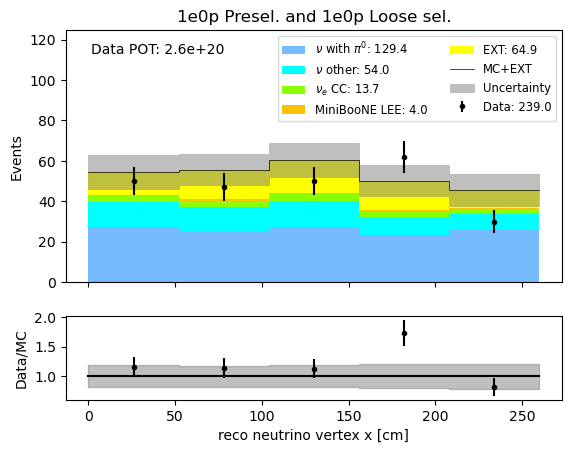

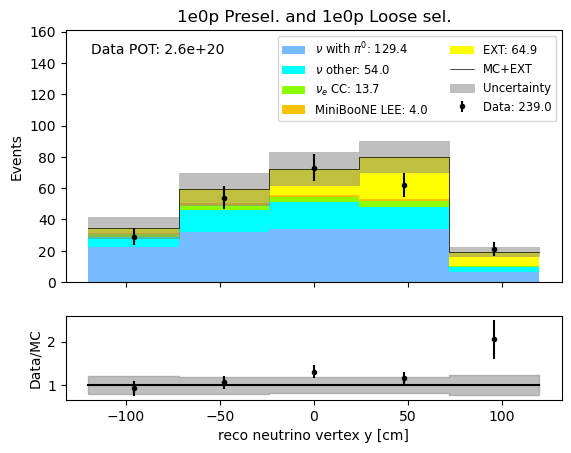

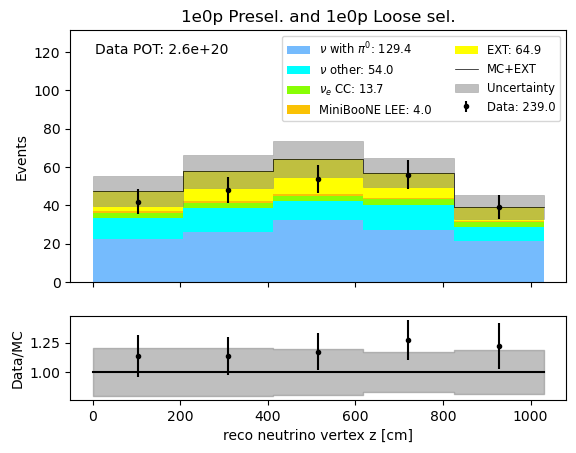

In [4]:
import matplotlib.pyplot as plt
from microfit import variable_definitions as vdef
from microfit import selections

selection = "ZPLOOSESEL"
preselection = "ZP"
variables = vdef.vtx_variables

for binning_def in variables:
    # some binning definitions have more than 4 elements,
    # we ignore the last ones for now
    binning = hist.Binning.from_config(*binning_def[:4])
    signal_generator = hist.RunHistGenerator(
        rundata,
        binning,
        data_pot=data_pot,
        selection=selection,
        preselection=preselection,
        sideband_generator=None,
        uncertainty_defaults=None,
    )
    
    plotter = rp.RunHistPlotter(signal_generator)
    axes = plotter.plot(
        category_column="paper_category",
        include_multisim_errors=True,
        add_ext_error_floor=False,
        show_data_mc_ratio=True,
    )
    plt.show()
    